In [368]:
import pandas as pd


In [369]:
path="/Users/nooreen/Desktop/High margin/PZ/notebooks/Jet's Pizza Store Details.xlsx"

input_data_ar=pd.read_excel(path)

input_data_ar=input_data_ar[input_data_ar['*state']=='FL']
input_data_ar['*zip_code']=input_data_ar['*zip_code'].astype(str)

zip_income_dict = dict(zip(input_data_ar['*zip_code'], input_data_ar['household_median_income']))
zip_store_ids = dict(zip(input_data_ar['*zip_code'], input_data_ar['*name']))


In [370]:
input_data_ar['*zip_code']


77     34698
78     33765
117    33334
137    34104
141    33547
145    33708
147    33928
148    34684
150    33803
191    33511
208    34232
209    32225
221    32541
224    33991
236    33907
237    34108
286    32703
289    33903
290    34202
314    33434
316    33065
320    33411
321    33060
323    33904
328    34286
335    33618
342    33328
344    34134
351    33954
372    34221
386    33809
387    32129
395    34119
414    32504
419    33770
423    34761
429    32257
433    32073
Name: *zip_code, dtype: object

In [371]:
input_data_ar[input_data_ar['*zip_code']=='33547']


,*monday lobby,*tuesday lobby,*wednesday lobby,*thursday lobby,*friday lobby,*saturday lobby,*sunday lobby,text_to_order_url,text_to_order_note,*ordering_url,...,*store_phone,companymanaged,dma,timezone,latitude,longitude,opendate,AADT,classification,household_median_income
141,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-23:00:00,10:00:00-23:00:00,11:00:00-22:00:00,https://www.jetspizza.com/textorder/?jets_id=F...,Text your order to get 15% off menu-priced pizza,https://ordering.jetspizza.com/?uniqueStoreIde...,...,8136545388,False,Tampa-St. Petersburg (Sarasota),Eastern (UTC -5 / -4),27.853051,-82.267708,2008-03-12,31500.0,suburban,121769.0


In [372]:
input_data_ar.columns


Index(['*monday lobby', '*tuesday lobby', '*wednesday lobby',
       '*thursday lobby', '*friday lobby', '*saturday lobby', '*sunday lobby',
       'text_to_order_url', 'text_to_order_note', '*ordering_url', 'status',
       'pro_order_url', 'pro_order_note', '*ordering_platform', 'possystem',
       '*name', '*address_1', 'address_2', '*city', 'county', '*state',
       '*zip_code', 'store_local_reference', '*store_phone', 'companymanaged',
       'dma', 'timezone', 'latitude', 'longitude', 'opendate', 'AADT',
       'classification', 'household_median_income'],
      dtype='object')

In [373]:
input_data=pd.read_csv('../data/input_data.csv').drop(columns=['Unnamed: 0','household_total_income'])
input_data['zip_code']=input_data['zip_code'].astype(str)
zip_code_list=list(input_data['zip_code'].unique())
input_data.head(2)


,zip_code,area_classification,traffic_count,population
0,34698,urban,32500.0,38010
1,33765,urban,49000.0,13844


In [374]:
input_data['household_median_income']=input_data['zip_code'].map(zip_income_dict)


In [375]:

input_data[input_data['zip_code']=='33547']


,zip_code,area_classification,traffic_count,population,household_median_income
4,33547,suburban,31500.0,30935,121769.0


# area square miles 


In [376]:
square_miles=pd.read_csv('/Users/nooreen/Desktop/High margin/PZ/notebooks/GEOINFO2023.GEOINFO-Data.csv')
# square_miles=square_miles[1:]

# Set the first row as column names and reset the index
square_miles.columns = square_miles.iloc[0]  # Set first row as column names
square_miles = square_miles[1:].reset_index(drop=True)  # Remove the first row and reset index

square_miles['zip_code'] = square_miles['Geographic Area Name'].apply(lambda x: x.split(' ')[-1])
square_miles['zip_code']=square_miles['zip_code'].astype(str)
zip_code_ex=list(square_miles['zip_code'].unique())
square_miles.head(2)



,Geographic Identifier,Geographic Area Name,"Area (Land, in square meters)","Area (Water, in square meters)","Area (Land, in square miles)","Area (Water, in square miles)",Internal Point (Latitude),Internal Point (Longitude),NaN,zip_code
0,860Z200US32003,ZCTA5 32003,41020988,18177131,15.838,7.018,30.0955841,-81.7101617,NaN,32003
1,860Z200US32008,ZCTA5 32008,390088888,6731030,150.614,2.599,29.9079199,-82.8974653,NaN,32008


In [377]:
# 33547


In [378]:
print(len(zip_code_list))
# checking the zip code info
zip_union = set(zip_code_ex).intersection(set(zip_code_list))
len(zip_union)


38


38

In [379]:

square_miles_df=square_miles[['zip_code','Area (Land, in square miles)']]


In [380]:
data1=pd.merge(input_data,square_miles_df,on='zip_code',how='left')
data1


,zip_code,area_classification,traffic_count,population,household_median_income,"Area (Land, in square miles)"
0,34698,urban,32500.0,38010,67323.0,11.180
1,33765,urban,49000.0,13844,61910.0,4.177
2,33334,urban,35000.0,30138,69512.0,4.767
3,34104,suburban,38500.0,25485,70301.0,9.857
4,33547,suburban,31500.0,30935,121769.0,160.579
5,33708,suburban,45500.0,16034,83773.0,3.406
6,33928,suburban,30000.0,28955,100264.0,41.681
7,34684,suburban,91500.0,27078,67542.0,6.736
8,33803,urban,36000.0,29082,63180.0,16.592
9,33511,suburban,29500.0,56627,77383.0,16.045


# population density


In [381]:
data1.head()
data1[['population','Area (Land, in square miles)']]=data1[['population','Area (Land, in square miles)']].astype(float)


In [382]:
data1['population_density']=data1['population']/data1['Area (Land, in square miles)']
data1.head(2)


,zip_code,area_classification,traffic_count,population,household_median_income,"Area (Land, in square miles)",population_density
0,34698,urban,32500.0,38010.0,67323.0,11.180,3399.821109
1,33765,urban,49000.0,13844.0,61910.0,4.177,3314.340436


# addition of AADT


In [383]:
aadt={'34698':32500,
'33765':49000,
'33334': 35000,
'34104':38000,
'33547':31500,
'3708':45500,
'33928':30000,
'34684':91500,
'33803':36000,
'33511':29500,
'34232':53500,
'32225':60000,
'32541':12400,
'33991':16200,
'33907':23000,
'34108':57000,
'32703':58500,
'33903':36000,
'34202':58000,
'33434':38000,
'33065':30500,
'33411':41500,
'33060':4200,
'33904':52500,
'34286':9500,
'33618':64000,
'33328':35500,
'34134':26500,
'33954':7800,
'34221':5000,
'33809':57500,
'32129':24000,
'34119':14300,
'32504':19100,
'33770':19400,
'34761':25000,
'32257':37000,
'32073':59500,
'33708':45500

}

data1['AADT']=data1['zip_code'].map(aadt)
data1.head(2)


,zip_code,area_classification,traffic_count,population,household_median_income,"Area (Land, in square miles)",population_density,AADT
0,34698,urban,32500.0,38010.0,67323.0,11.180,3399.821109,32500
1,33765,urban,49000.0,13844.0,61910.0,4.177,3314.340436,49000


In [384]:
data1.to_csv('revised_input_data.csv')


In [385]:
# # household income
# # population density
# # square miles area
# input_data_rev=data1[['household_total_income','population_density','Area (Land, in square miles)','zip_code']]
# input_data_rev.to_csv('revised_input_data.csv')


# clustering


In [386]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler


import time
from numpy import log as ln

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator



from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

        
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [387]:
input_data1=pd.read_csv('revised_input_data.csv').drop(columns=['Unnamed: 0'])

input_data1.drop(index=[4], inplace=True)

input_data1.head(2)


,zip_code,area_classification,traffic_count,population,household_median_income,"Area (Land, in square miles)",population_density,AADT
0,34698,urban,32500.0,38010.0,67323.0,11.180,3399.821109,32500
1,33765,urban,49000.0,13844.0,61910.0,4.177,3314.340436,49000


In [388]:
input_data1.columns


Index(['zip_code', 'area_classification', 'traffic_count', 'population',
       'household_median_income', 'Area (Land, in square miles)',
       'population_density', 'AADT'],
      dtype='object')

In [389]:
input_data1.isna().sum()


zip_code                        0
area_classification             0
traffic_count                   1
population                      0
household_median_income         0
Area (Land, in square miles)    0
population_density              0
AADT                            0
dtype: int64

In [390]:
input_data=input_data1[['household_median_income', 'Area (Land, in square miles)', 'population_density']]
# df2=input_data[[
#        'household_total_income', 'Area (Land, in square miles)',
#        'population_density', 'AADT']]
input_data.head(2)


,household_median_income,"Area (Land, in square miles)",population_density
0,67323.0,11.180,3399.821109
1,61910.0,4.177,3314.340436


In [391]:

# df=pd.read_csv('revised_input_data.csv').drop(columns=['Unnamed: 0'])
# df=data1.copy()
# df.drop(columns=['area_classification','zip_code'],inplace=True)
# df.isna().sum()
# df.dropna(inplace=True)
# df.drop(index=[4], inplace=True)
# df.dropna(inplace=True)


In [392]:
df=input_data.copy()


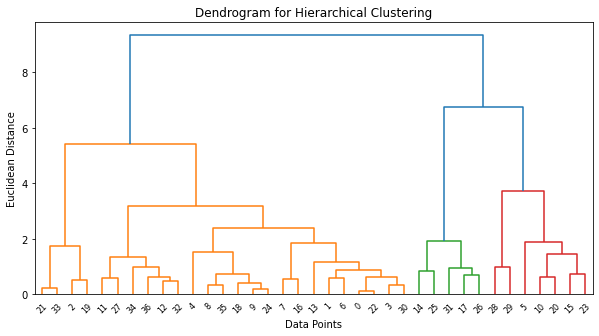

In [393]:


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Standardize features


# Step 2: Plot the Dendrogram to determine clusters
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [394]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster_scores = {}  # Dictionary to store (n_clusters, linkage) and silhouette scores


for i in range(2, 6):
    for lin in ["single", "complete", "average", "ward"]:  # Ward replaces "mcquitty", "median", "centroid" (unsupported)
        hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=lin)
        df['Cluster'] = hc.fit_predict(df_scaled)  

        silhouette_avg = silhouette_score(df_scaled, df['Cluster'].values)
        
        cluster_scores[(i, lin)] = silhouette_avg  # Store as key-value pair

# Find the best (n_clusters, linkage) based on the highest silhouette score
best_params = max(cluster_scores, key=cluster_scores.get)
best_score = cluster_scores[best_params]

print(f"Best number of clusters: {best_params[0]}, Best linkage: {best_params[1]}, Silhouette score: {best_score}")
cluster_scores



Best number of clusters: 2, Best linkage: single, Silhouette score: 0.4811253877516873


{(2, 'single'): 0.4811253877516873,
 (2, 'complete'): 0.3575582529489957,
 (2, 'average'): 0.36318249605316566,
 (2, 'ward'): 0.4039356595723741,
 (3, 'single'): 0.3068424850970235,
 (3, 'complete'): 0.2597985554394821,
 (3, 'average'): 0.4579198343273429,
 (3, 'ward'): 0.4579198343273429,
 (4, 'single'): 0.3840025695776189,
 (4, 'complete'): 0.32836829220554914,
 (4, 'average'): 0.4123484453245242,
 (4, 'ward'): 0.421914071850167,
 (5, 'single'): 0.29997922289077633,
 (5, 'complete'): 0.3404627289975214,
 (5, 'average'): 0.39772389638630884,
 (5, 'ward'): 0.41655930908389943}

In [395]:
# Step 3: Choose Number of Clusters and Apply Agglomerative Clustering
n_clusters = 3  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(df_scaled)  # Assign cluster labels

silhouette_avg = silhouette_score(df_scaled, df['Cluster'].values)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4579198343273429


In [396]:
def twoD_data_creation_with_boundaries(labels, scaled_data):
    # Perform t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['cluster'] = labels
    # tsne_df=tsne_df[tsne_df['cluster']!=-1]
    
    # Plot points with cluster colors
    fig = px.scatter(tsne_df, x="tsne1", y="tsne2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    # Add convex hull boundaries
    for cluster_id in tsne_df['cluster'].unique():
        cluster_points = tsne_df[tsne_df['cluster'] == cluster_id][['tsne1', 'tsne2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [397]:

# twoD_data_creation_with_boundaries(df['Cluster'].values, df_scaled)


In [398]:
def pca_2d(labels, scaled_data):
    # Perform PCA
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=pca_results, columns=['pca1', 'pca2'])
    pca_df['cluster'] = labels
    # pca_df = pca_df[pca_df['cluster'].isin([ -1,12])]
    
    # Plot points with cluster colors
    fig = px.scatter(pca_df, x="pca1", y="pca2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    
    # Add convex hull boundaries
    for cluster_id in pca_df['cluster'].unique():
        cluster_points = pca_df[pca_df['cluster'] == cluster_id][['pca1', 'pca2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [399]:
pca_2d(df['Cluster'].values, df_scaled)


In [400]:
df


,household_median_income,"Area (Land, in square miles)",population_density,Cluster
0,67323.0,11.180,3399.821109,0
1,61910.0,4.177,3314.340436,0
2,69512.0,4.767,6322.215230,0
3,70301.0,9.857,2585.472253,0
5,83773.0,3.406,4707.574868,0
6,100264.0,41.681,694.681030,1
7,67542.0,6.736,4019.893112,0
8,63180.0,16.592,1752.772420,0
9,77383.0,16.045,3529.261452,0
10,81041.0,11.033,3142.481646,0


In [401]:
df.sort_values(by='Cluster')


,household_median_income,"Area (Land, in square miles)",population_density,Cluster
0,67323.0,11.180,3399.821109,0
35,90406.0,17.457,2760.669073,0
34,58071.0,5.200,4899.038462,0
33,74067.0,10.490,2077.311725,0
31,65936.0,7.520,2871.542553,0
28,83081.0,8.609,1282.378906,0
25,79850.0,8.466,3127.096622,0
23,66933.0,9.731,3291.439729,0
22,59757.0,6.953,5147.849849,0
20,70435.0,8.579,6955.122975,0


In [406]:
df['zip_code']=input_data1['zip_code'].values
df['zip_code']=df['zip_code'].astype(str)


In [407]:

df['store_id']=df['zip_code'].map(zip_store_ids)


In [408]:
df


,household_median_income,"Area (Land, in square miles)",population_density,Cluster,zip_code,store_id
0,67323.0,11.180,3399.821109,0,34698,FL-010
1,61910.0,4.177,3314.340436,0,33765,FL-009
2,69512.0,4.767,6322.215230,0,33334,FL-005
3,70301.0,9.857,2585.472253,0,34104,FL-013
5,83773.0,3.406,4707.574868,0,33708,FL-015
6,100264.0,41.681,694.681030,1,33928,FL-016
7,67542.0,6.736,4019.893112,0,34684,FL-008
8,63180.0,16.592,1752.772420,0,33803,FL-017
9,77383.0,16.045,3529.261452,0,33511,FL-018
10,81041.0,11.033,3142.481646,0,34232,FL-012


In [409]:
input_data1.head(2)


,zip_code,area_classification,traffic_count,population,household_median_income,"Area (Land, in square miles)",population_density,AADT
0,34698,urban,32500.0,38010.0,67323.0,11.180,3399.821109,32500
1,33765,urban,49000.0,13844.0,61910.0,4.177,3314.340436,49000


In [410]:
df.head(2)


,household_median_income,"Area (Land, in square miles)",population_density,Cluster,zip_code,store_id
0,67323.0,11.180,3399.821109,0,34698,FL-010
1,61910.0,4.177,3314.340436,0,33765,FL-009


In [411]:
df.to_csv('jtz_clusters02.csv',index=False)


In [413]:
dd1=pd.read_csv('jtz_clusters02.csv')
dd1.Cluster.unique()


array([0, 1, 2])

# kmeans


In [302]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


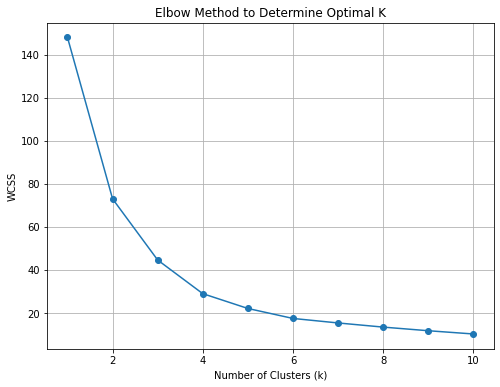

In [243]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# df=input_data.copy()
def choose_k_elbow(scaled_data, max_k=10):
    wcss = []  # Store Within-Cluster Sum of Squares for each k

    # Test K-Means with k ranging from 1 to max_k
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method to Determine Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()
choose_k_elbow(scaled_data, max_k=10)


In [244]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_scores = {}  # Dictionary to store n_clusters and silhouette scores

for i in range(2, 6):  # Testing for cluster numbers from 2 to 5
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Using n_init=10 for stable results
    l = kmeans.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, l)

    cluster_scores[i] = silhouette_avg  # Store as key-value pair

# Find the best n_clusters based on the highest silhouette score
best_n_clusters = max(cluster_scores, key=cluster_scores.get)
best_score = cluster_scores[best_n_clusters]

print(f"Best number of clusters: {best_n_clusters}, Silhouette score: {best_score}")
cluster_scores


Best number of clusters: 4, Silhouette score: 0.41541571947063827


{2: 0.3719849484181047,
 3: 0.38927216740418397,
 4: 0.41541571947063827,
 5: 0.35521081579696073}

In [245]:
k=3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Using n_init=10 for stable results
df['Cluster'] = kmeans.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, df['Cluster'].values)

print(silhouette_avg)


0.38927216740418397


In [246]:
twoD_data_creation_with_boundaries(df['Cluster'].values, scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.703585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.553062
[t-SNE] KL divergence after 1000 iterations: 0.354524


In [247]:
pca_2d(df['Cluster'].values, scaled_data)


In [227]:

reversed_data=pd.DataFrame(scaler.inverse_transform(scaled_data),columns=df.columns)
reversed_data['cluster']=df['Cluster'].values
clusters=list(set(df['Cluster'].values))
cluster_mean_df=pd.DataFrame()
reversed_data


,household_median_income,"Area (Land, in square miles)",population_density,Cluster,cluster
0,67323.0,11.180,3399.821109,5.551115e-17,1
1,61910.0,4.177,3314.340436,5.551115e-17,1
2,69512.0,4.767,6322.215230,5.551115e-17,1
3,70301.0,9.857,2585.472253,5.551115e-17,1
4,83773.0,3.406,4707.574868,5.551115e-17,1
5,100264.0,41.681,694.681030,1.000000e+00,0
6,67542.0,6.736,4019.893112,5.551115e-17,1
7,63180.0,16.592,1752.772420,5.551115e-17,1
8,77383.0,16.045,3529.261452,5.551115e-17,1
9,81041.0,11.033,3142.481646,5.551115e-17,1


In [228]:
reversed_data[reversed_data['cluster']==1]


,household_median_income,"Area (Land, in square miles)",population_density,Cluster,cluster
0,67323.0,11.180,3399.821109,5.551115e-17,1
1,61910.0,4.177,3314.340436,5.551115e-17,1
2,69512.0,4.767,6322.215230,5.551115e-17,1
3,70301.0,9.857,2585.472253,5.551115e-17,1
4,83773.0,3.406,4707.574868,5.551115e-17,1
6,67542.0,6.736,4019.893112,5.551115e-17,1
7,63180.0,16.592,1752.772420,5.551115e-17,1
8,77383.0,16.045,3529.261452,5.551115e-17,1
9,81041.0,11.033,3142.481646,5.551115e-17,1
13,49826.0,7.343,3401.879341,5.551115e-17,1


In [229]:
reversed_data[reversed_data['cluster']==0]


,household_median_income,"Area (Land, in square miles)",population_density,Cluster,cluster
5,100264.0,41.681,694.681030,1.0,0
15,70338.0,32.110,1706.789162,1.0,0
20,89329.0,34.852,2129.174796,1.0,0
23,74712.0,27.442,801.690839,1.0,0
28,74314.0,53.902,892.026270,1.0,0
29,67112.0,65.860,465.062253,1.0,0


In [57]:
reversed_data['Cluster'].unique()


array([0., 1.])

In [58]:
input_data


,household_total_income,"Area (Land, in square miles)",population_density
0,18161,11.180,3399.821109
1,6126,4.177,3314.340436
2,12905,4.767,6322.215230
3,11521,9.857,2585.472253
5,8052,3.406,4707.574868
6,14289,41.681,694.681030
7,12686,6.736,4019.893112
8,12588,16.592,1752.772420
9,22685,16.045,3529.261452
10,15335,11.033,3142.481646


In [59]:
reversed_data['zip_code']=input_data1['zip_code'].values


In [60]:
reversed_data.drop(columns='Cluster',inplace=True)


In [69]:
# reversed_data.to_csv('jtz_clusters_without_addt.csv',index=False)
p=pd.read_csv('jtz_clusters_without_addt.csv')
p.to_csv('jtz_clusters_without_aadt.csv',index=False)


In [68]:
# reversed_data.to_csv('jtz_clusters_without_addt.csv',index=False)
p=pd.read_csv('jtz_clusters_with_addt.csv')
# p.drop(columns='Cluster',inplace=True)
p.to_csv('jtz_clusters_with_aadt.csv',index=False)


In [ ]:
# model with aadt
# no.of clusters: 2
# Silhouette Score=0.3847479763017808

# model without aadt
# no.of clusters: 2
# Silhouette Score: 0.4600637673680892

